<a href="https://colab.research.google.com/github/thalyz/praticaACD1/blob/main/trabalho_pr%C3%A1tico_1_java.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#IMPORTAÇÃO
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
import numpy as np

url = "https://raw.githubusercontent.com/thalyz/praticaACD1/refs/heads/main/Tempos.csv"

data = pd.read_csv(url, sep=',', engine='python', header=None, keep_default_na=False)
data.columns = ['Algoritmos', 'AMD Ryzen 3', '12 Gen Intel Core I5', '7 Gen Intel Core I5', '5 Gen Intel Core I3 - 480 M', 'Tamanho']
data = data[1:]
for col in data.columns[1:5]:
    data[col] = data[col].str.replace(',', '.').astype(float)

labels_machines = data.columns[1:5]
labels_y = data.columns[1:]
labels_x = data['Tamanho']

data.head(50)

,Algoritmos,AMD Ryzen 3,12 Gen Intel Core I5,7 Gen Intel Core I5,5 Gen Intel Core I3 - 480 M,Tamanho
1,Insertion Sort,0.0001,0.0002,0.0001,0.0020,100
2,Merge Sort,0.0001,0.0001,0.0011,0.0020,100
3,Bubble Sort,0.0002,0.0001,0.0002,0.0029,100
4,Selection Sort,0.0001,0.0001,0.0014,0.0023,100
5,Shell Sort,0.0001,0.0001,0.0000,0.0019,100
6,Heap Sort,0.0001,0.0001,0.0002,0.0005,100
7,Quick Sort,0.0001,0.0001,0.0001,0.0002,100
8,Counting Sort,0.0023,0.0029,0.0001,0.0001,100
9,Radix Sort,0.0001,0.0001,0.0000,0.0001,100
10,Bucket Sort,0.0001,0.0002,0.0003,0.0007,100


In [23]:
# SEPARAÇÃO POR MÉTODOS
tamanhos = {
    "t_100": np.array([0,1,2,3,4,5,6,7,8,9]),
    "t_1000": np.array([10,11,12,13,14,15,16,17,18,19]),
    "t_10000": np.array([20,21,22,23,24,25,26,27,28,29]),
    "t_100000": np.array([30,31,32,33,34,35,36,37,38,39]),
    "t_1000000": np.array([40,41,42,43,44,45,46,47,48,49])
}

resultados_tamanhos = {key: [] for key in tamanhos.keys()}
for nome, indices in tamanhos.items():
    for codigo in indices:
        if codigo < len(labels_x):
            resultados_tamanhos[nome].append(data['Tamanho'].iloc[codigo])
    print(f"{nome}: {resultados_tamanhos[nome]}\n")

# SEPARAÇÃO POR MÉTODOS
metodos = {
    "insertion": np.array([0,10,20,30,40]),
    "merge": np.array([1,11,21,31,41]),
    "bubble": np.array([2,12,22,32,42]),
    "selection": np.array([3,13,23,33,43]),
    "shell": np.array([4,14,24,34,44]),
    "heap": np.array([5,15,25,35,45]),
    "quick": np.array([6,16,26,36,46]),
    "counting": np.array([7,17,27,37,47]),
    "radix": np.array([8,18,28,38,48]),
    "bucket": np.array([9,19,29,39,49])
}
resultados_metodos = {key: [] for key in metodos.keys()}
for nome, indices in metodos.items():
    for codigo in indices:
        if codigo < len(labels_x):
            resultados_metodos[nome].append(data['Tamanho'].iloc[codigo])
    print(f"{nome}: {resultados_metodos[nome]}\n")

t_100: ['100', '100', '100', '100', '100', '100', '100', '100', '100', '100']

t_1000: ['1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000']

t_10000: ['10000', '10000', '10000', '10000', '10000', '10000', '10000', '10000', '10000', '10000']

t_100000: ['100000', '100000', '100000', '100000', '100000', '100000', '100000', '100000', '100000', '100000']

t_1000000: ['1000000', '1000000', '1000000', '1000000', '1000000', '1000000', '1000000', '1000000', '1000000', '1000000']

insertion: ['100', '1000', '10000', '100000', '1000000']

merge: ['100', '1000', '10000', '100000', '1000000']

bubble: ['100', '1000', '10000', '100000', '1000000']

selection: ['100', '1000', '10000', '100000', '1000000']

shell: ['100', '1000', '10000', '100000', '1000000']

heap: ['100', '1000', '10000', '100000', '1000000']

quick: ['100', '1000', '10000', '100000', '1000000']

counting: ['100', '1000', '10000', '100000', '1000000']

radix: ['100', '1000', '10000', '100000', '1000000']

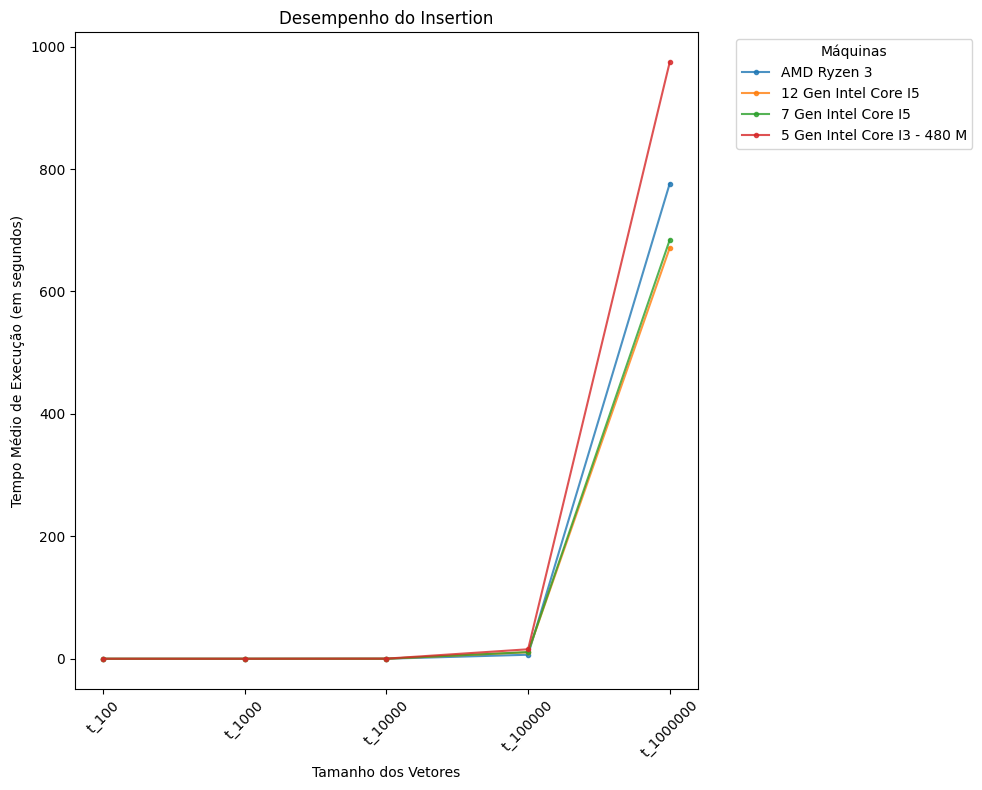

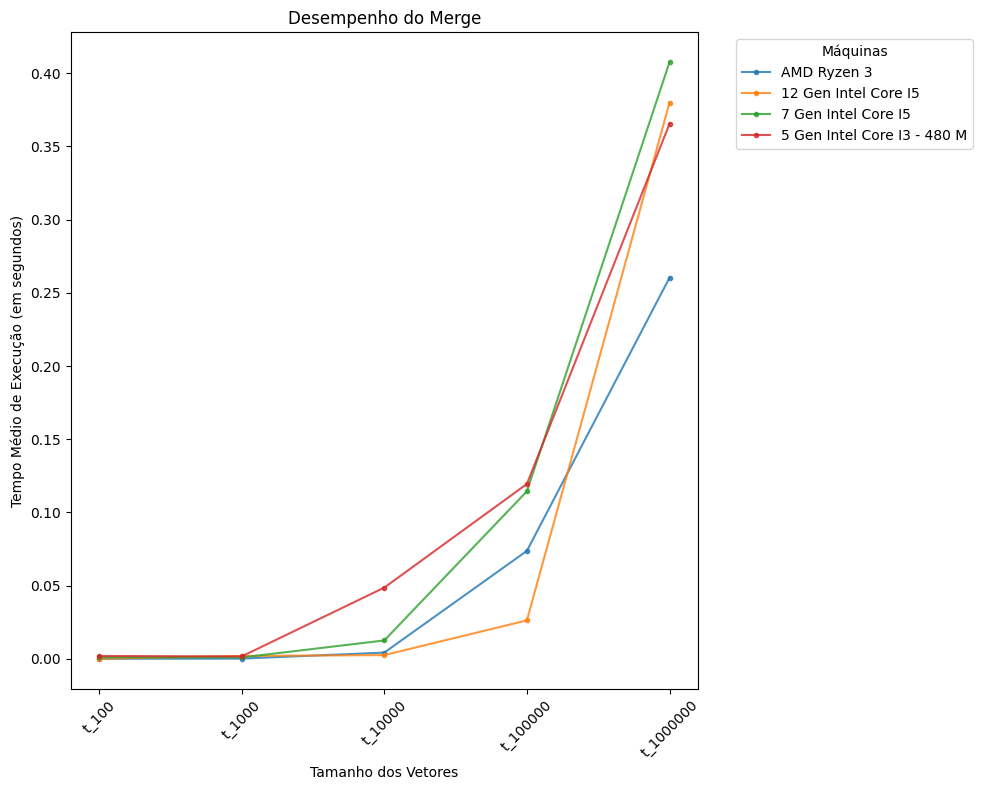

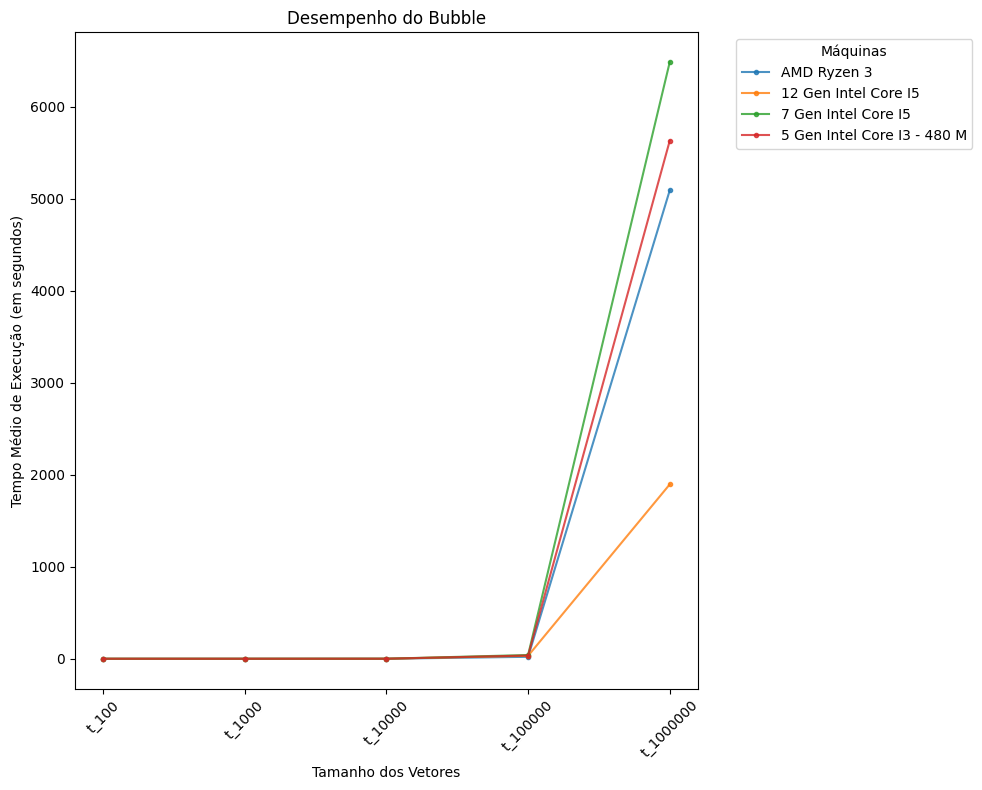

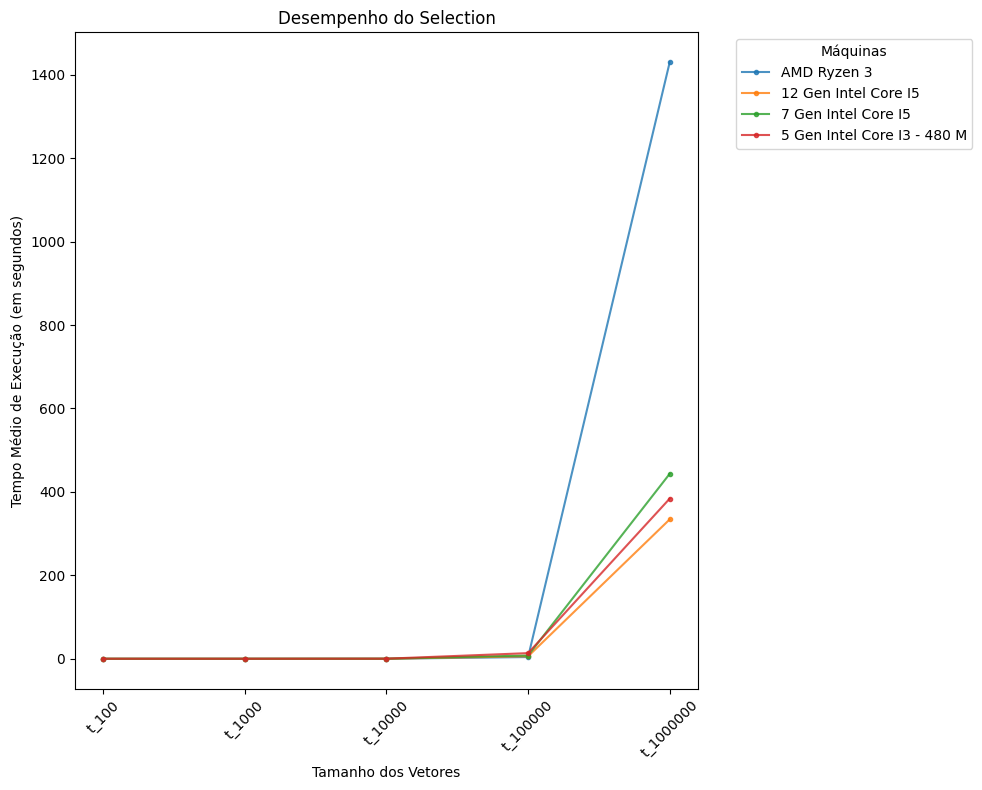

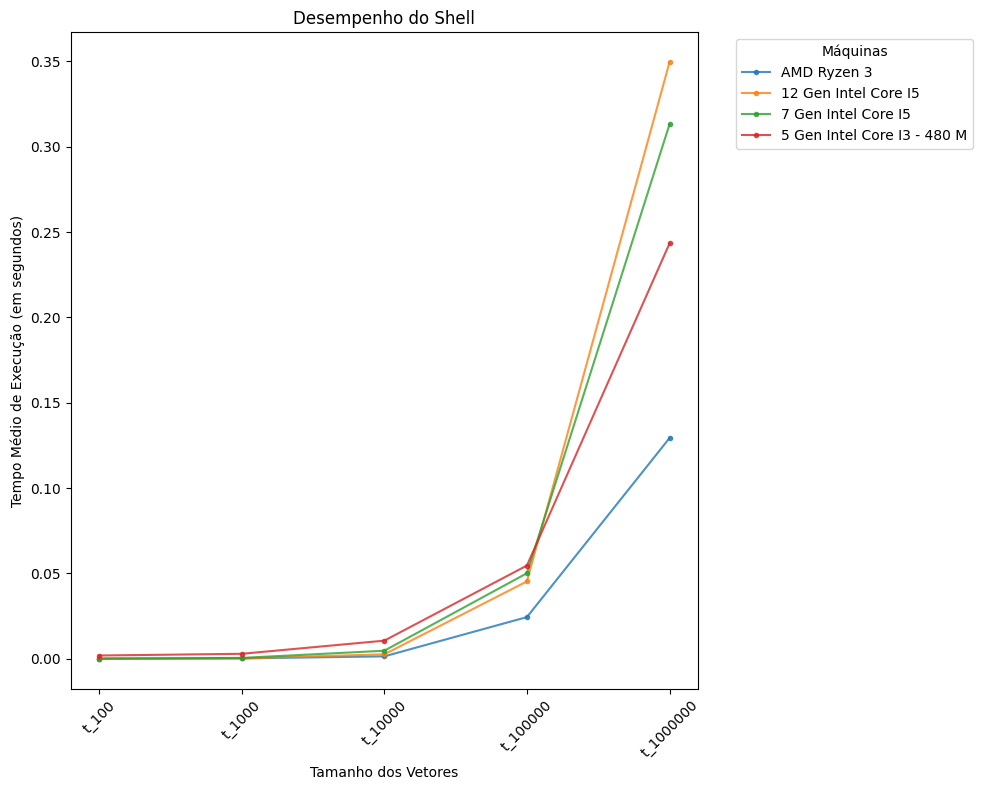

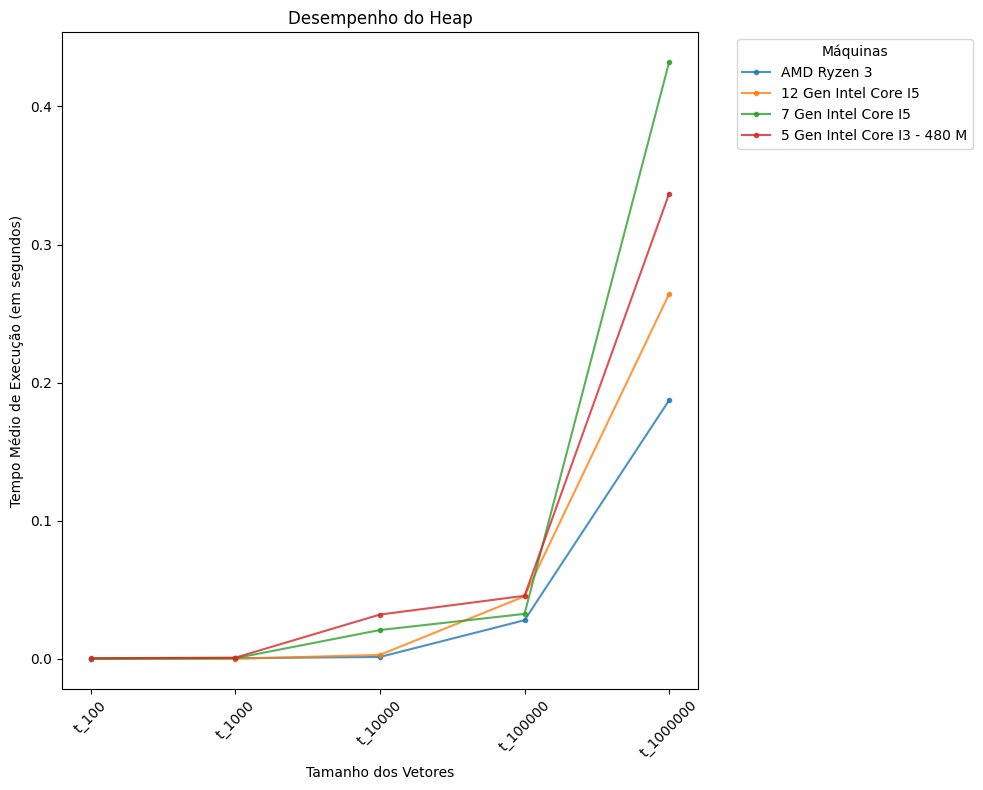

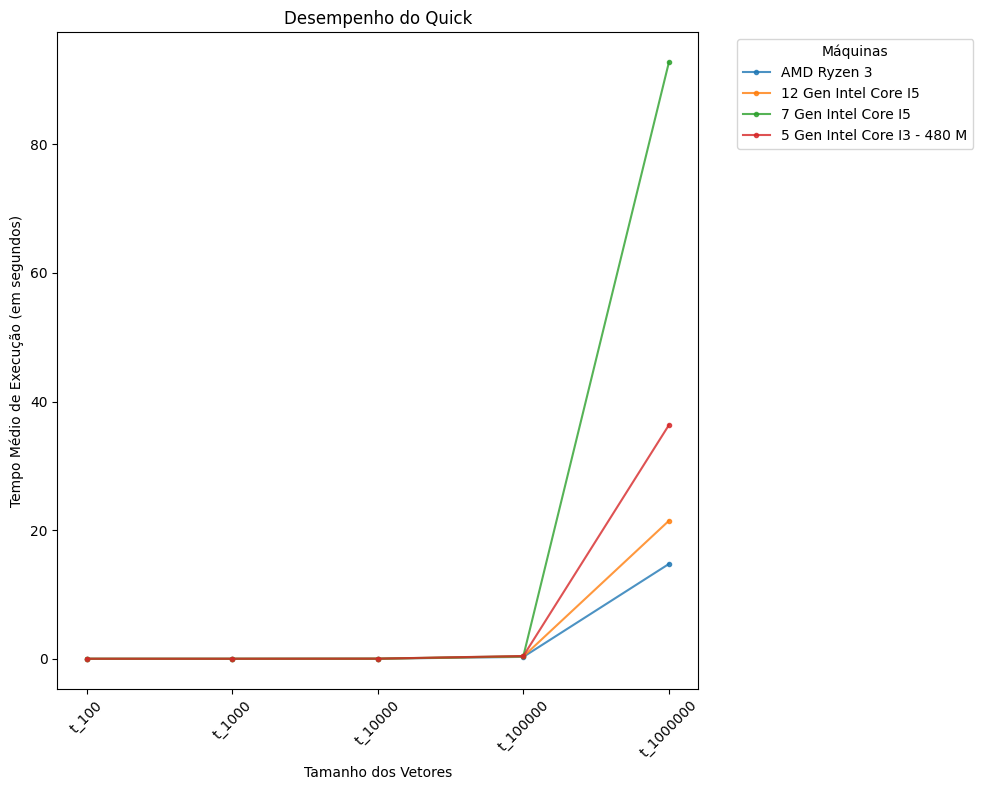

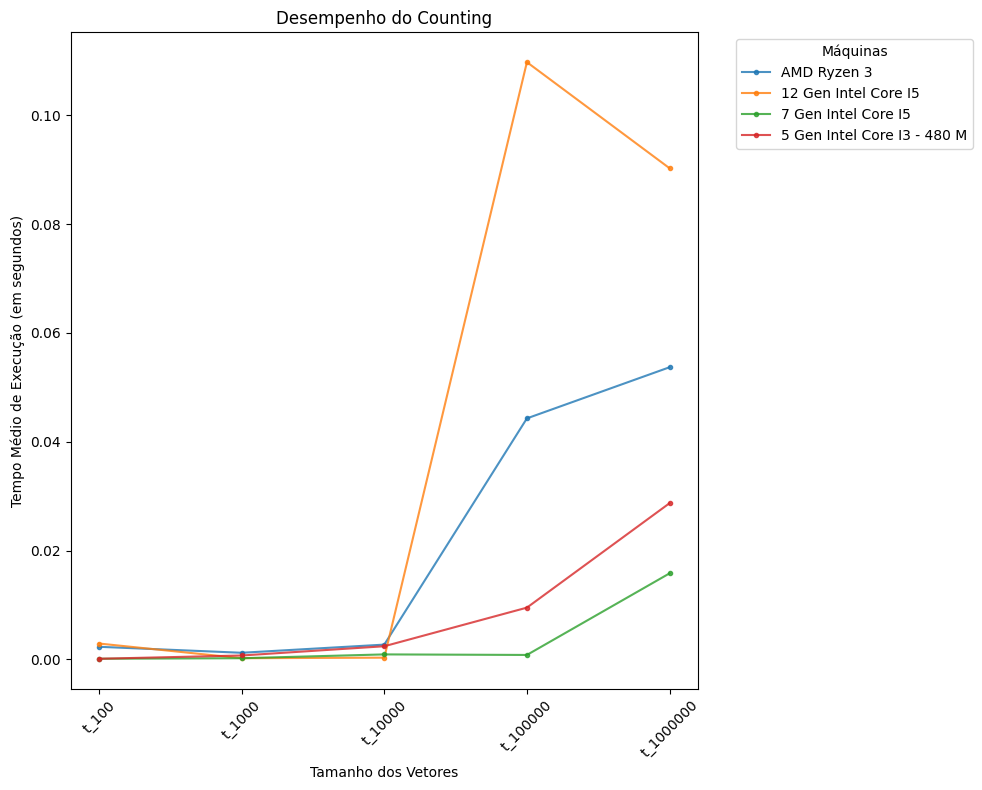

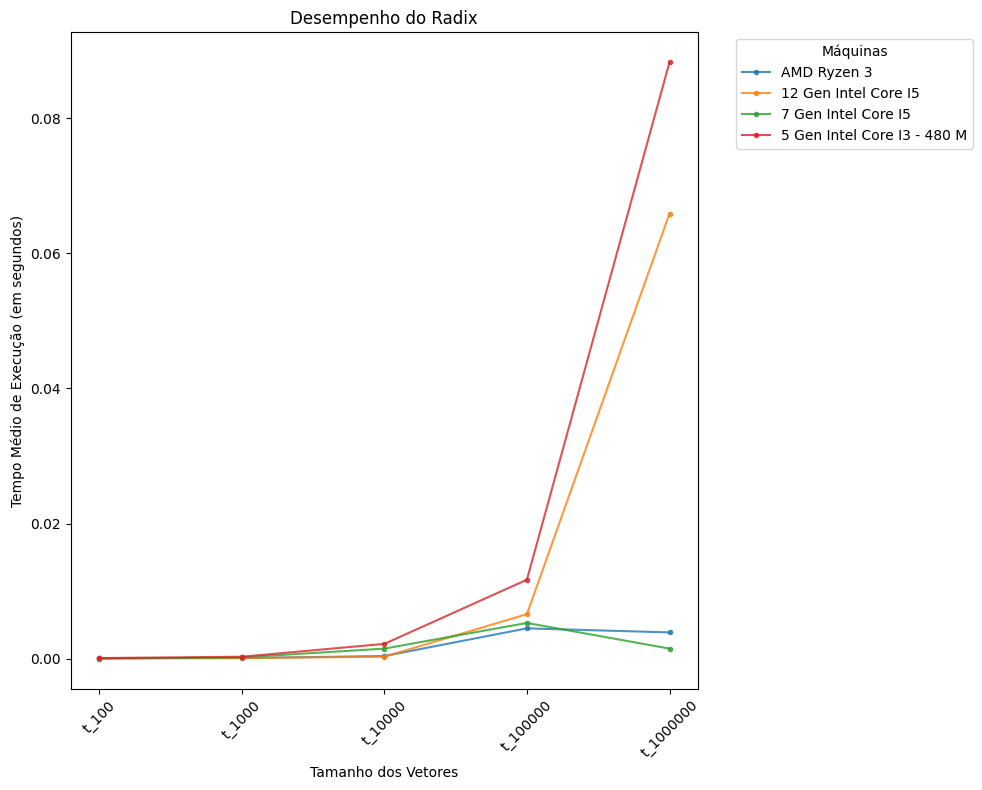

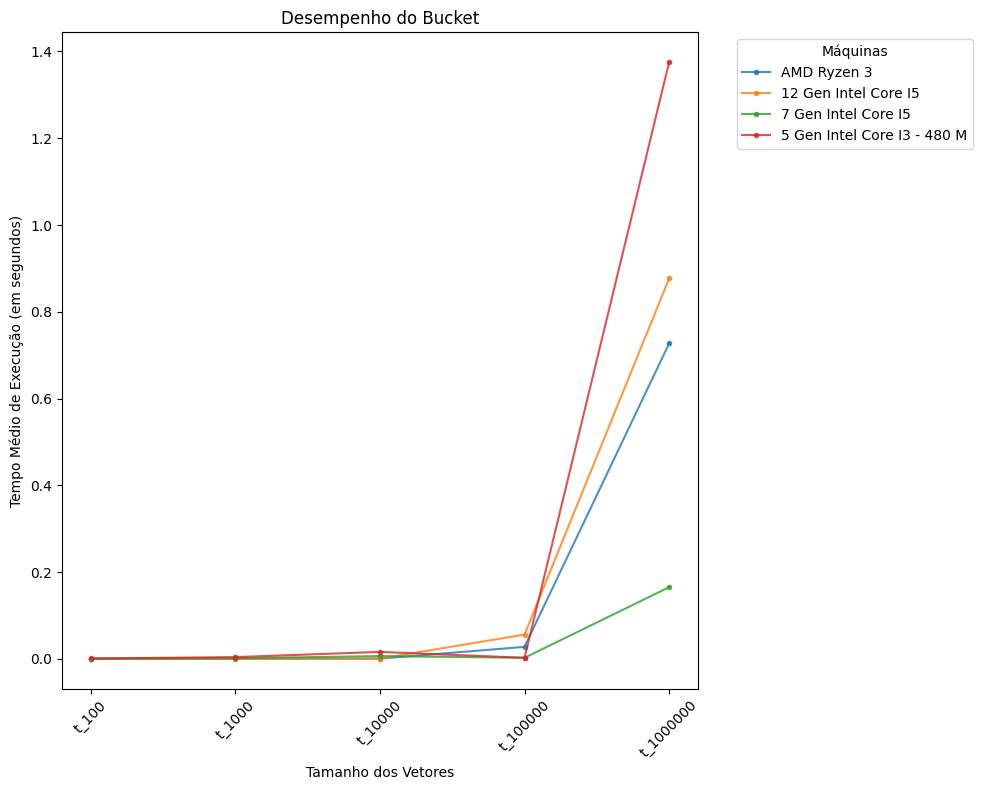

In [25]:
maquinas = ['AMD Ryzen 3', '12 Gen Intel Core I5', '7 Gen Intel Core I5', '5 Gen Intel Core I3 - 480 M']

for metodo, indices in metodos.items():
    plt.figure(figsize=(10, 8))
    for i, maquina in enumerate(maquinas):
        tempos = data.iloc[indices, i + 1].values
        plt.plot(tamanhos.keys(), tempos, label=maquina, alpha=0.8, marker='o', linestyle='-', markersize=3)
    plt.title(f"Desempenho do {metodo.capitalize()}")
    plt.xlabel("Tamanho dos Vetores")
    plt.ylabel("Tempo Médio de Execução (em segundos)")
    plt.legend(title="Máquinas", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"{metodo}_desempenho.png")
    plt.show()